In [41]:
import pickle, math
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, roc_curve, roc_auc_score, average_precision_score

In [3]:
file = open("fifofot-full.pkl",'rb')
fin_ip_full, fin_op_full, fin_op_thresh_full =  pickle.load(file)
file.close()

In [4]:
file = open("fifofot-equal.pkl",'rb')
fin_ip_equal, fin_op_equal, fin_op_thresh_equal =  pickle.load(file)
file.close()

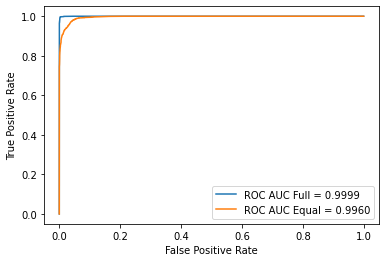

In [32]:
fpr1, tpr1, _ = roc_curve(fin_ip_full, fin_op_thresh_full)
plt.plot(fpr1, tpr1, label='ROC AUC Full = {:.4f}'.format(roc_auc_score(fin_ip_full, fin_op_thresh_full)))
fpr2, tpr2, _ = roc_curve(fin_ip_equal, fin_op_thresh_equal)
plt.plot(fpr2, tpr2, label='ROC AUC Equal = {:.4f}'.format(roc_auc_score(fin_ip_equal, fin_op_thresh_equal)))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.savefig("AUROC-full-equal.pdf", bbox_inches='tight')

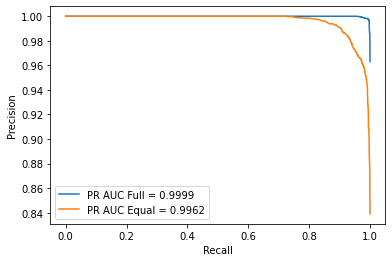

In [33]:
precision1, recall1, _ = precision_recall_curve(fin_ip_full, fin_op_thresh_full)
plt.plot(recall1, precision1, label='PR AUC Full = {:.4f}'.format(average_precision_score(fin_ip_full,
                                                                                    fin_op_thresh_full)))
precision2, recall2, _ = precision_recall_curve(fin_ip_equal, fin_op_thresh_equal)
plt.plot(recall2, precision2, label='PR AUC Equal = {:.4f}'.format(average_precision_score(fin_ip_equal,
                                                                                    fin_op_thresh_equal)))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.savefig("AUPRC-full-equal.pdf", bbox_inches='tight')

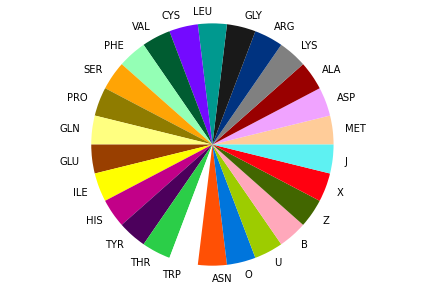

In [38]:
seq = ["M","D","A","K","R","G","L","C","V","F","S","P","Q","E","I"
           ,"H","Y","T","W","N", "O", "U", "B", "Z", "X", "J"]

colours = ["#FFCC99","#F0A3FF","#990000","#808080","#003380","#191919","#00998F",
           "#740AFF","#005C31","#94FFB5","#FFA405","#8F7C00","#FFFF80","#993F00",
           "#FFFF00","#C20088","#4C005C","#2BCE48","#FFFFFF","#FF5005","#0075DC",
           "#9DCC00","#FFA8BB","#426600","#FF0010","#5EF1F2"]

d = {'CYS': 'C', 'ASP': 'D', 'SER': 'S', 'GLN': 'Q', 'LYS': 'K',
     'ILE': 'I', 'PRO': 'P', 'THR': 'T', 'PHE': 'F', 'ASN': 'N', 
     'GLY': 'G', 'HIS': 'H', 'LEU': 'L', 'ARG': 'R', 'TRP': 'W', 
     'ALA': 'A', 'VAL': 'V', 'GLU': 'E', 'TYR': 'Y', 'MET': 'M',
     'O': 'O', 'U' : 'U', 'B': 'B', 'Z' : 'Z', 'X': 'X', 'J': 'J'}
AAdict = {v: k for k, v in d.items()}

labels = [AAdict[shortcode] for shortcode in seq]
sizes = [1]*len(seq)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, colors = colours)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.savefig("colourMap.pdf", bbox_inches='tight')

In [42]:
look_up_table =  np.zeros((len(seq), len(seq), 3))

map_LUT = dict(zip(seq, range(0, len(seq))))

for i in range(len(seq)):
    for j in range(len(seq)):
        cola = colours[map_LUT[seq[i]]].lstrip('#')
        colb = colours[map_LUT[seq[j]]].lstrip('#')
        r1, g1, b1 = tuple(int(cola[i:i+2], 16) for i in (0, 2, 4))
        r2, g2, b2 = tuple(int(colb[i:i+2], 16) for i in (0, 2, 4))
        look_up_table[i, j, 0] = math.sqrt((r1**2 + r2**2)/2)/255
        look_up_table[i, j, 1] = math.sqrt((g1**2 + g2**2)/2)/255
        look_up_table[i, j, 2] = math.sqrt((b1**2 + b2**2)/2)/255

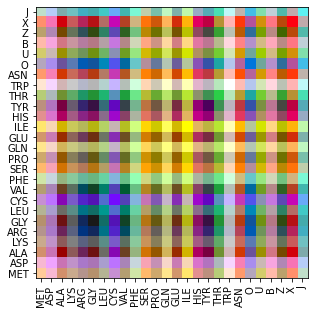

In [49]:
f = plt.figure(figsize=(5, 5))
plt.yticks(list(range(0,26)), labels, rotation='horizontal')
plt.xticks(list(range(0,26)), labels, rotation='vertical')
plt.imshow(look_up_table, origin='lower')
f.savefig("LookUpTable.pdf", bbox_inches='tight')